* Candle stick by mpl_finance

In [7]:
import glob
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pylab as plt
import mpl_finance
from scipy import stats
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

In [2]:
paths = glob.glob('./data/2017/*.txt')

col_names = ['code', 'name', 'open', 'high', 'low', 'close', 'volume']

# get code list
df_code = pd.read_csv(paths[0], delimiter='\t', encoding='SHIFT-JIS', header=None, names=col_names)
codes = df_code.iloc[1:, 0].as_matrix()

for path in tqdm(paths[1:]):

    df_code = pd.read_csv(path, delimiter='\t', encoding='SHIFT-JIS', header=None, names=col_names)
    codes = list(set(codes) & set(df_code.iloc[1:, 0].as_matrix()))
    
# code filtering
codes = np.array(codes)[np.array(codes) > 1700]

# get price data
df_all = pd.read_csv(paths[0], delimiter='\t', encoding='SHIFT-JIS', header=None, names=col_names)
date = str(df_all.iloc[0, 0])
date = date[:4] + '-' + date[4:6] + '-' + date[6:]
df_all['date'] = date
df_all = df_all.iloc[1:, :]
df_all = df_all[df_all['code'].isin(codes)]

for path in tqdm(paths[1:]):
    
    df = pd.read_csv(path, delimiter='\t', encoding='SHIFT-JIS', header=None, names=col_names)
    date = str(df.iloc[0, 0])
    date = date[:4] + '-' + date[4:6] + '-' + date[6:]
    df['date'] = date
    df = df.iloc[1:, :]
    df = df[df['code'].isin(codes)]
    df_all = pd.concat([df_all, df])

df_all['date'] = pd.to_datetime(df_all['date'])
df_all = df_all.sort_values(by=['code', 'date'], ascending=True)
print(len(df_all))

100%|██████████| 246/246 [00:13<00:00, 18.06it/s]


715806


In [3]:
c = 7203

start_date = '2017-01-01'
end_date = '2017-06-30'

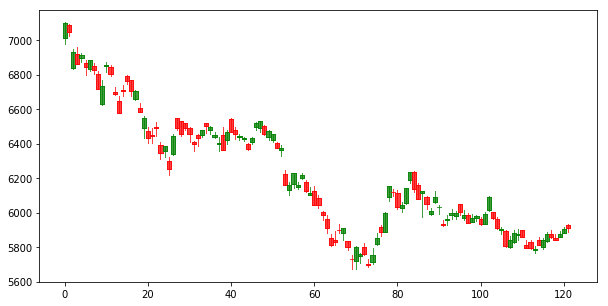

In [6]:
# ローソク足

df_tmp = df_all[df_all['code'] == c]
df_tmp = df_tmp[(start_date < df_tmp['date']) & (df_tmp['date'] < end_date)]

fig, ax = plt.subplots(figsize=(10, 5))
mpl_finance.candlestick2_ohlc(
    ax,
    opens=df_tmp['open'],
    highs=df_tmp['high'],
    lows=df_tmp['low'],
    closes=df_tmp['close'],
    width=1.0,
    colorup='green',
    colordown='red',
)
plt.show()